<a href="https://colab.research.google.com/github/jcdumlao14/Projects/blob/main/ClimateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Climate Analysis of England's Weather"**

Climate analysis based on this dataset can include studying various weather parameters such as temperature, wind speed, pressure, humidity, and precipitation type over a specific time period. The dataset contains hourly data of weather parameters, so we can analyze climate trends over daily, monthly, and yearly timescales. We can perform statistical analysis and create visualizations using tools like seaborn, matplotlib, and pandas to understand climate patterns and trends over time. We can also perform anomaly detection and clustering analysis to detect unusual patterns in the dataset.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import datetime as dt
from datetime import timedelta
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

# **Load the Data**

In [ ]:
# Load the data
weather_df = pd.read_csv('/content/EnglandWeather.csv')
weather_df.head().style.set_properties(**{'background-color':'yellow','color':'black','border-color':'#8b8c8c'})

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,17.114300,1016.660000,0.890000
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,16.615200,1016.150000,0.850000
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,20.253800,1015.870000,0.820000
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,14.490000,1015.560000,0.820000
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,13.942600,1014.980000,0.860000


In [ ]:
weather_df.shape

(96453, 7)

In [ ]:
# Check the data types of each column
weather_df.dtypes

Formatted Date           object
Summary                  object
Precip Type              object
Temperature (C)         float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
Humidity                float64
dtype: object

In [ ]:
weather_df.sort_values('Formatted Date', inplace= True)
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,17.1143,1016.66,0.89
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,16.6152,1016.15,0.85
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,20.2538,1015.87,0.82
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,14.4900,1015.56,0.82
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,13.9426,1014.98,0.86
...,...,...,...,...,...,...,...
96448,2016-12-31 19:00:00.000 +0100,Mostly Cloudy,rain,0.488889,9.7566,1020.03,0.86
96449,2016-12-31 20:00:00.000 +0100,Mostly Cloudy,rain,0.072222,9.4185,1020.27,0.88
96450,2016-12-31 21:00:00.000 +0100,Mostly Cloudy,snow,-0.233333,9.2736,1020.50,0.89
96451,2016-12-31 22:00:00.000 +0100,Mostly Cloudy,snow,-0.472222,9.2414,1020.65,0.91


In [ ]:
# Convert the formatted column to datetime:
weather_df['Formatted Date'] = pd.to_datetime(weather_df.sort_values('Formatted Date')['Formatted Date'],utc=True)

In [ ]:
weather_df['Formatted Date'] = weather_df['Formatted Date'].sort_values()

In [ ]:
weather_df['Formatted Date']

0       2005-12-31 23:00:00+00:00
1       2006-01-01 00:00:00+00:00
2       2006-01-01 01:00:00+00:00
3       2006-01-01 02:00:00+00:00
4       2006-01-01 03:00:00+00:00
                   ...           
96448   2016-12-31 18:00:00+00:00
96449   2016-12-31 19:00:00+00:00
96450   2016-12-31 20:00:00+00:00
96451   2016-12-31 21:00:00+00:00
96452   2016-12-31 22:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [ ]:
weather_df.dtypes

Formatted Date          datetime64[ns, UTC]
Summary                              object
Precip Type                          object
Temperature (C)                     float64
Wind Speed (km/h)                   float64
Pressure (millibars)                float64
Humidity                            float64
dtype: object

In [ ]:
# check if ther is null values 
weather_df.isnull().sum()

Formatted Date            0
Summary                   0
Precip Type             517
Temperature (C)           0
Wind Speed (km/h)         0
Pressure (millibars)      0
Humidity                  0
dtype: int64

In [ ]:
# Separate formatted column to day, month and year
weather_df['Day'] = weather_df['Formatted Date'].dt.day
weather_df['Month'] = weather_df['Formatted Date'].dt.month
weather_df['Year'] = weather_df['Formatted Date'].dt.year


In [ ]:
weather_df.groupby('Year')

In [ ]:
# To know how many data exist in each year
Year = pd.to_datetime(weather_df['Formatted Date']).dt.year

In [ ]:
# In each month
Month = pd.to_datetime(weather_df['Formatted Date']).dt.month

Next, let's visualize the distribution of temperature, pressure, and humidity using box plots:

<Axes: >

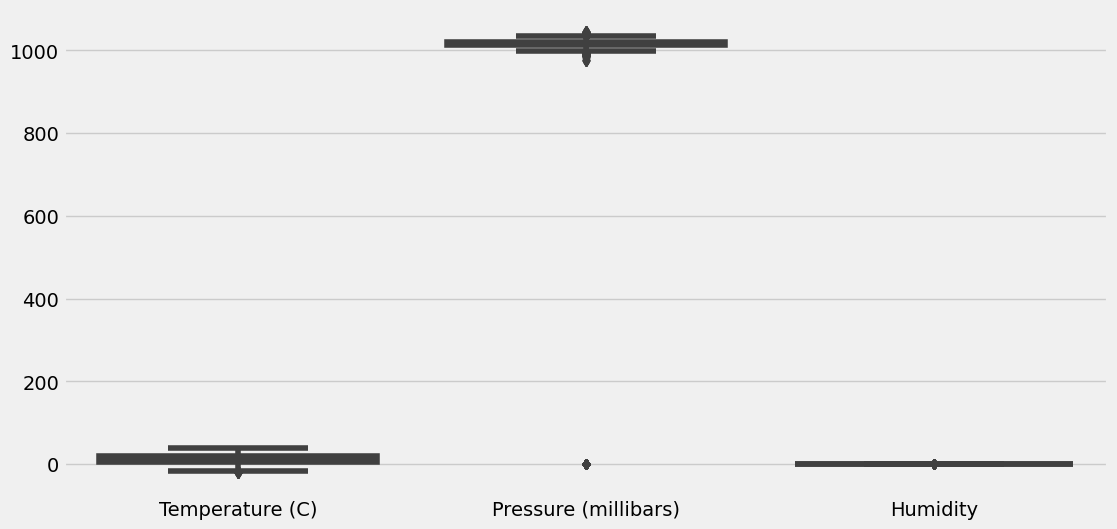

In [ ]:
sns.boxplot(data=weather_df[['Temperature (C)', 'Pressure (millibars)', 'Humidity']])


This will give us a visual representation of the range, median, and outliers for each variable.

We can also use line plots to visualize the trend of temperature, pressure, and humidity over time:



# **Temperature, pressure and humidity Over Time by Year**

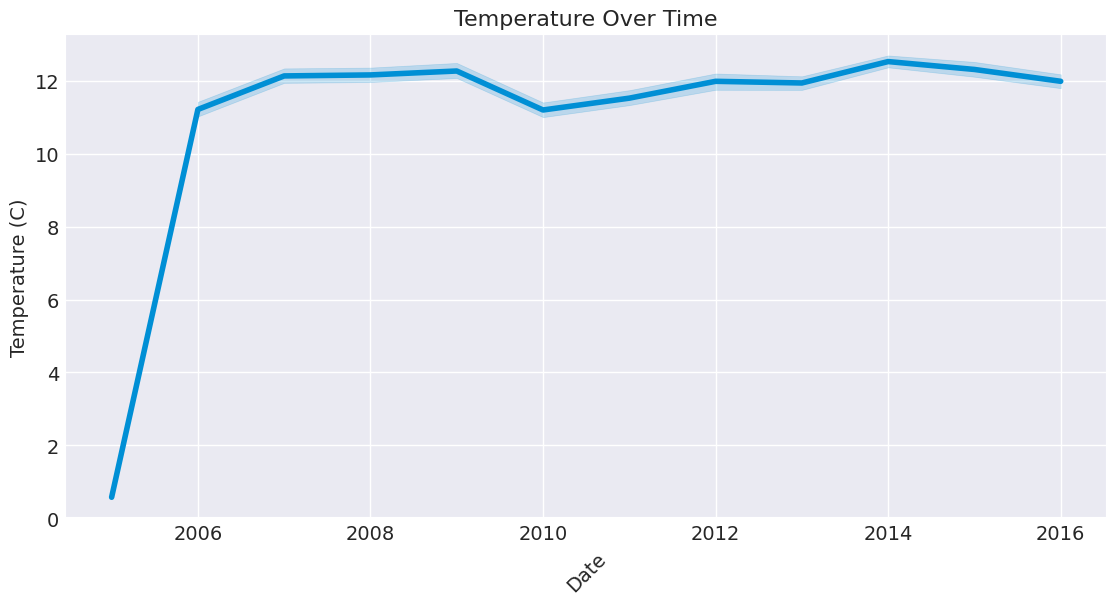

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_df, x='Year', y='Temperature (C)')
plt.xlabel('Date', fontsize=14, rotation=45)
plt.ylabel('Temperature (C)', fontsize=14)
plt.title('Temperature Over Time', fontsize=16)
plt.show()


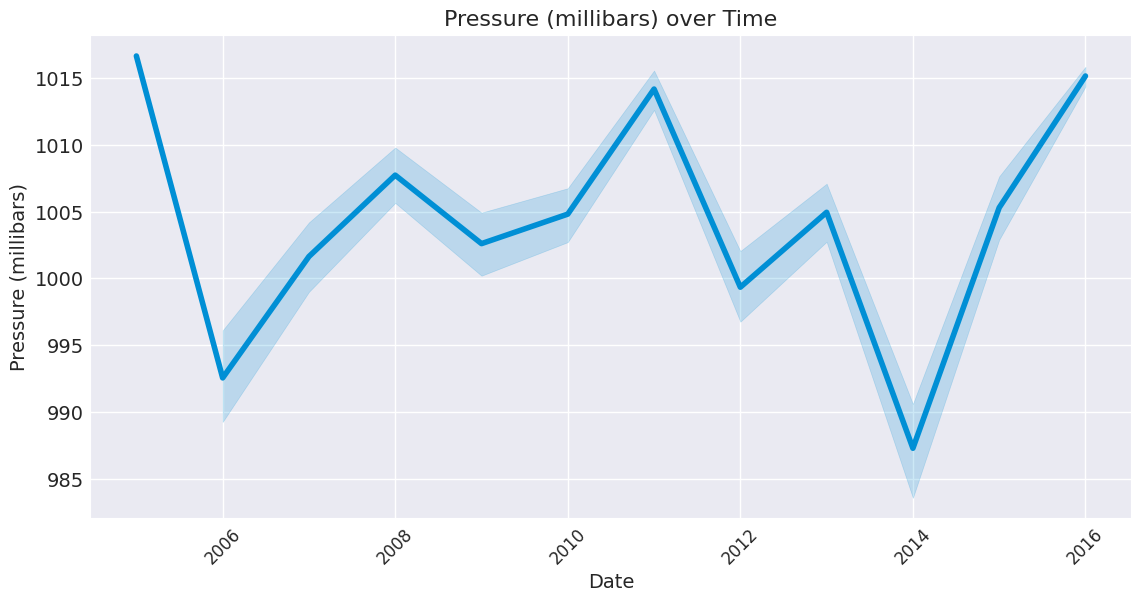

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=weather_df, x='Year', y='Pressure (millibars)')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Pressure (millibars)', fontsize=14)
plt.title('Pressure (millibars) over Time', fontsize=16)
plt.show()


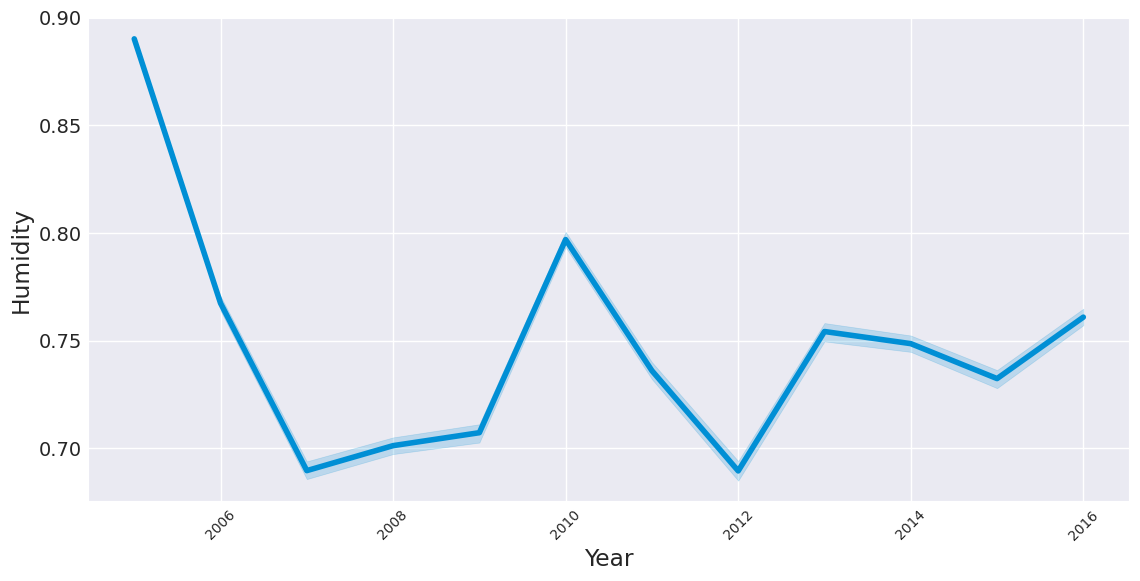

In [ ]:
sns.lineplot(data=weather_df, x='Year', y='Humidity')
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()

# **Temperature, pressure and humidity Over Time by Month**

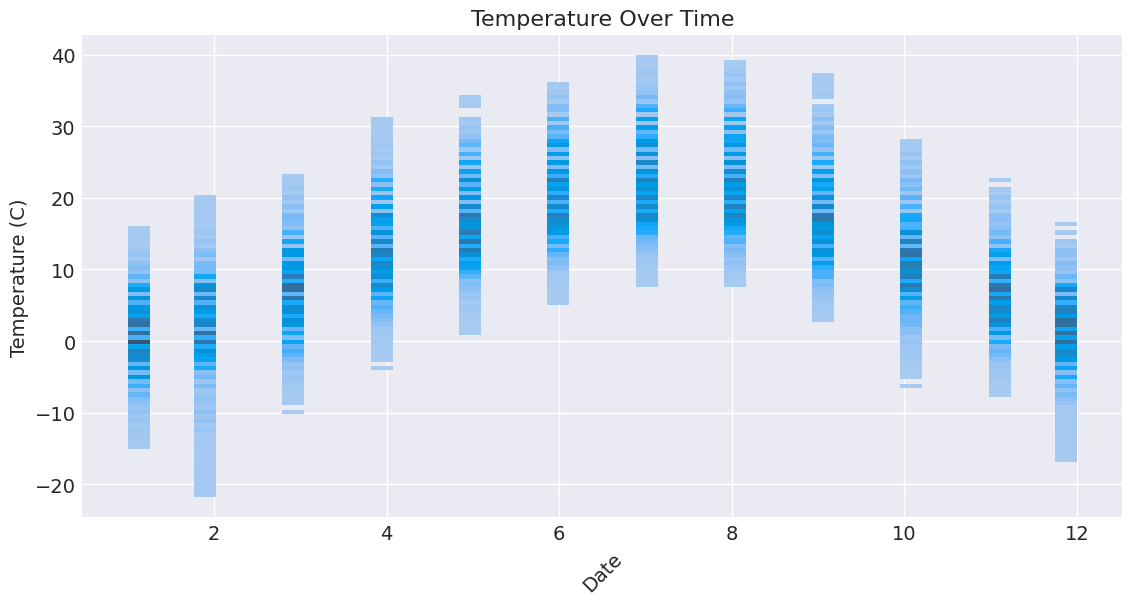

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=weather_df, x='Month', y='Temperature (C)')
plt.xlabel('Date', fontsize=14, rotation=45)
plt.ylabel('Temperature (C)', fontsize=14)
plt.title('Temperature Over Time', fontsize=16)
plt.show()


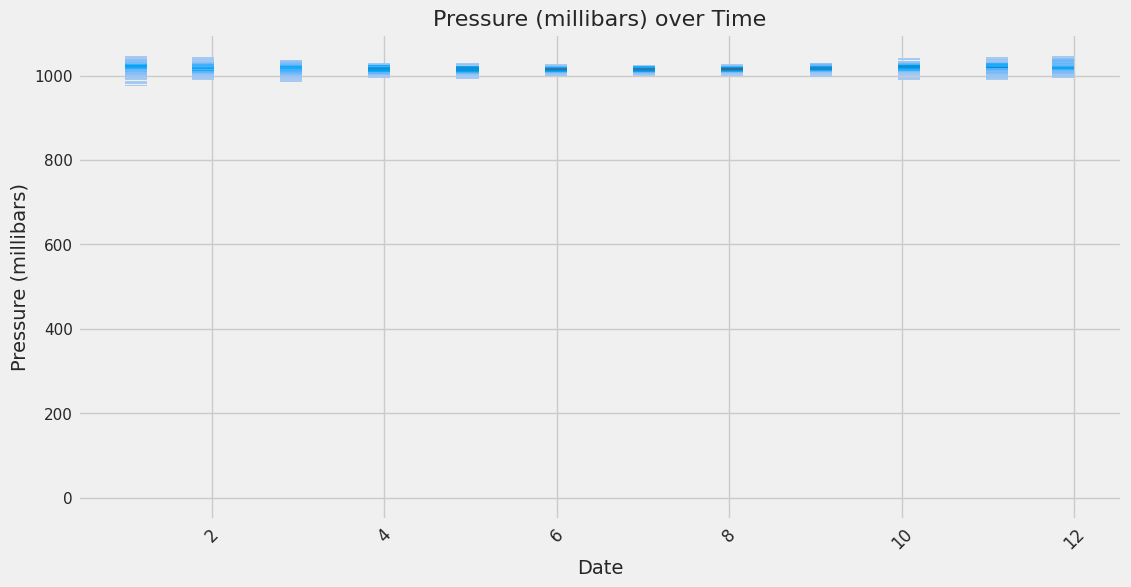

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather_df, x='Month', y='Pressure (millibars)')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Pressure (millibars)', fontsize=14)
plt.title('Pressure (millibars) over Time', fontsize=16)
plt.show()

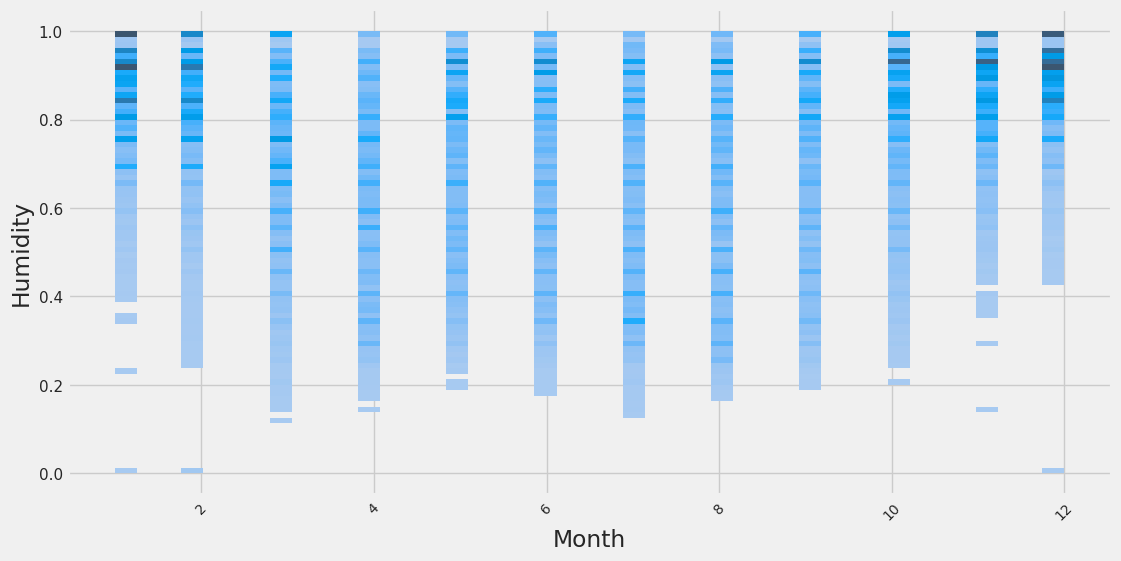

In [ ]:
sns.histplot(data=weather_df, x='Month', y='Humidity')
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()

This will give us a sense of how each variable changes over time.

Finally, we can use heatmap to visualize the correlation between temperature, pressure, and humidity:

<Axes: >

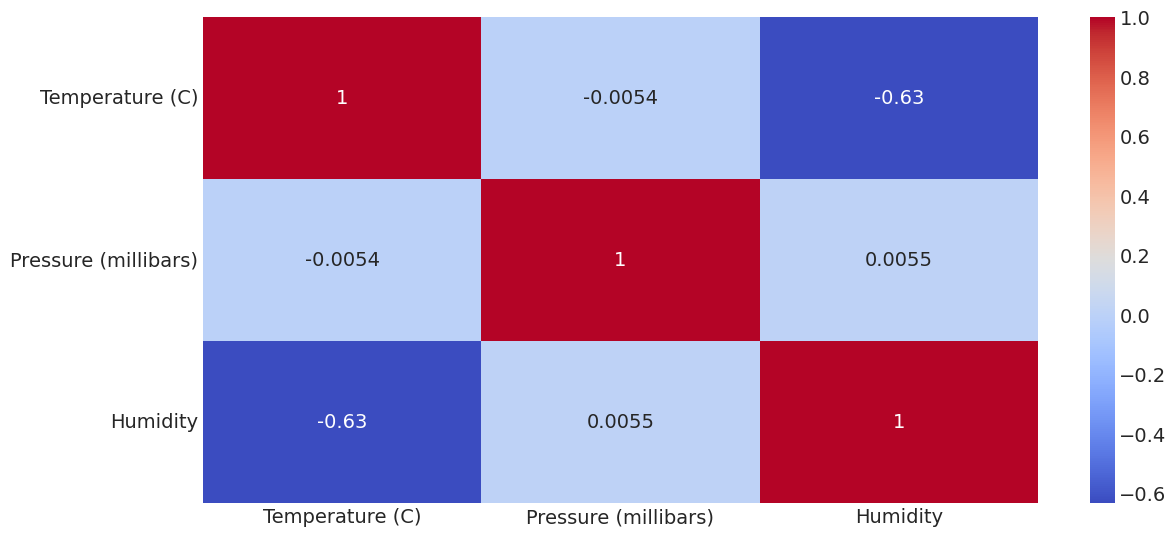

In [ ]:
sns.heatmap(weather_df[['Temperature (C)', 'Pressure (millibars)', 'Humidity']].corr(), annot=True, cmap='coolwarm')


This will give us a visual representation of how strongly each variable is correlated with the others.